<a href="https://colab.research.google.com/github/Robinkim0125/DataAnalysis/blob/main/MovieGenreClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

캐글 IMDb 장르 분류 데이터

출처 : [https://www.kaggle.com/hijest/genre-classification-dataset-imdb](https://www.kaggle.com/hijest/genre-classification-dataset-imdb) (원출처: IMDB.com)

[https://s3.ap-northeast-2.amazonaws.com/materials.spartacodingclub.kr/data_new/week02/test_data_solution.txt](https://s3.ap-northeast-2.amazonaws.com/materials.spartacodingclub.kr/data_new/week02/test_data_solution.txt)

In [1]:
import pandas as pd

train = pd.read_table('train_data.txt', sep=':::', names=['Index','Genre','Content'])
test = pd.read_table('test_data_solution.txt', sep=':::', names=['Index','Genre','Content'])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [2]:
train.head(3)

,Index,Genre,Content
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


In [3]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    54214 non-null  object
 1   Genre    54214 non-null  object
 2   Content  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54200 entries, 1 to 54200
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    54200 non-null  object
 1   Genre    54200 non-null  object
 2   Content  54200 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [4]:
train['Genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [5]:
y_train = train['Genre']
x_train = train['Content']
y_test = test['Genre']
x_test = test['Content']

In [6]:
y_train.head(3)

1        drama 
2     thriller 
3        adult 
Name: Genre, dtype: object

In [7]:
mapping = {' drama ':1, ' thriller ':2, ' adult ':3, ' documentary ':4, ' comedy ':5,
       ' crime ':6, ' reality-tv ':7, ' horror ':8, ' sport ':9, ' animation ':10,
       ' action ':11, ' fantasy ':12, ' short ':13, ' sci-fi ':14, ' music ':15,
       ' adventure ':16, ' talk-show ':17, ' western ':18, ' family ':19, ' mystery ':20,
       ' history ':21, ' news ':22, ' biography ':23, ' romance ':24, ' game-show ':25,
       ' musical ':26, ' war ':27}
y_train = y_train.replace(mapping)
y_test = y_test.replace(mapping)

In [8]:
y_train.head(3)

1    1
2    2
3    3
Name: Genre, dtype: int64

문장의 단어들의 벡터화

DTM / TF-IDF

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer() # DTM 벡터화를 위한 객체 생성
x_train_dtm = vector.fit_transform(corpus) # 해당 단어들을 벡터화 진행
print(x_train_dtm.toarray()) # 벡터가 어떻게 생겼는지 확인

tfidf_transformer = TfidfTransformer() # tfidf 벡터화를 위한 객체 생성
tfidfv = tfidf_transformer.fit_transform(x_train_dtm) # x_train_dtm에 대해서 벡터화 진행
print(tfidfv.toarray()) # 벡터가 어떻게 생겼는지 확인

# fit_transform --> train 데이터로 모델 학습할때 사용
# transform --> test 데이터로 검증할때 사용

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]


In [10]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [11]:
dtmvector=CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

In [12]:
tfidf_transformer = TfidfTransformer()
tfidfv=tfidf_transformer.fit_transform(x_train_dtm)

In [13]:
x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

모델 1. 나이브 베이즈 모델

In [14]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [15]:
predicted = mod.predict(tfidfv_test)
print( "정확도 : " , accuracy_score(y_test,predicted))

정확도 :  0.4426752767527675


모델 2. 로지스틱 리그레션

In [18]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10000)

In [19]:
predicted = lr.predict(tfidfv_test)
print( "정확도 : " , accuracy_score(y_test,predicted))

정확도 :  0.5868265682656827


모델 3. SVM (Support Vector Mechine)

In [21]:
lsvc = LinearSVC(C=1000, penalty='l2', max_iter=500)
lsvc.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1000, max_iter=500)

In [22]:
predicted = lsvc.predict(tfidfv_test)
print( "정확도 : " , accuracy_score(y_test,predicted))

정확도 :  0.5209225092250922


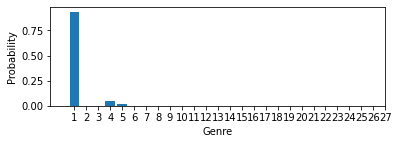

In [23]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.rcParams["figure.figsize"] = (10,10)
plt.bar(mod.classes_, mod.predict_proba(tfidfv_test[3])[0])
plt.xlim(-1, 21)
plt.xticks(mod.classes_)
plt.xlabel("Genre")
plt.ylabel("Probability")
plt.show()

In [29]:
x_test_dtm = dtmvector.transform(['gost exorcism']) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(predicted)

[8]


불용어 제거 (sklearn)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# dtm, tfidf 벡터 생성을 위한 객체 생성
dtmvector = CountVectorizer(stop_words="english") # 영어 스탑워드를 제거해달라는 뜻!
tfidf_transformer = TfidfTransformer()

# x_train에 대해서 dtm, tfidf 벡터 생성
x_train_dtm = dtmvector.fit_transform(x_train)
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

# 나이브 베이즈 분류기로 학습 진행
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

# x_test에 대해서 dtm, tfidf 벡터 생성
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.44474169741697417
